In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.fit_intercept = fit_intercept
        self.weights = None
        self.bias = None
        self.loss_history = []


    def _add_intercept(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])
    

    def _prepare_features(self, X):
        X = np.array(X, dtype=float)
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
            
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        return X
    

    def fit(self, X, y, verbose=False):
        X = self._prepare_features(X)
        y = np.array(y, dtype=float).squeeze()

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for i in range(self.iterations):
            loss = self._update_weights(X, y, n_samples)
            self.loss_history.append(loss)
            
            if verbose and i % np.ceil(self.iterations / 10) == 0:
                print(f"Iteration {i}: Loss = {loss:.6f}")

        print(f"Iteration {i}: Loss = {loss:.6f}\n")

        if self.fit_intercept:
            self.bias = self.weights[0]
            self.weights = self.weights[1:]

        else:
            self.bias = 0
            
        return self


    def _update_weights(self, X, y, n_samples):
        y_pred = np.squeeze(X @ np.expand_dims(self.weights, axis=1))
        error = y_pred - y

        dw = (2 / n_samples) * (X.T @ error)
        loss = np.mean(error ** 2)

        self.weights -= self.learning_rate * dw
        return loss


    def predict(self, X):
        X = self._prepare_features(X)

        if self.fit_intercept:
            predictions = X @ np.expand_dims(np.concatenate([[self.bias], self.weights]), axis=1)

        else:
            predictions = X @ np.expand_dims(self.weights, axis=1)
            
        predictions = np.squeeze(predictions)
        return predictions


    def score(self, X, y):  # вычисляет коэффициент детерминации R2
        y_pred = self.predict(X)

        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)

        if ss_tot == 0:
            return 1. if ss_res == 0 else 0.

        return 1 - (ss_res / ss_tot)
    
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'loss_history': self.loss_history
        }


    def __repr__(self):
        return f"LinearRegression(learning_rate={self.learning_rate}, iterations={self.iterations})"


Iteration 0: Loss = 49.638541
Iteration 20: Loss = 0.259974
Iteration 40: Loss = 0.216301
Iteration 60: Loss = 0.205328
Iteration 80: Loss = 0.202571
Iteration 100: Loss = 0.201879
Iteration 120: Loss = 0.201705
Iteration 140: Loss = 0.201661
Iteration 160: Loss = 0.201650
Iteration 180: Loss = 0.201647
Iteration 199: Loss = 0.201646

R2 Score: 0.9353
True function: y = 4 + 3*x + noise
Learned: y = 4.1067 + 2.8858*x


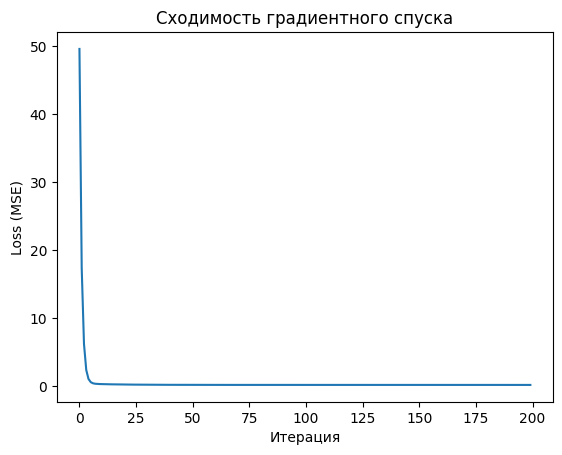

In [7]:
# Тестирование

if __name__ == "__main__":
    # Генерация данных
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = np.squeeze(4 + 3 * X + np.random.randn(100, 1) * 0.5)
    
    # Обучение модели
    model = LinearRegression(learning_rate=0.1, iterations=200)
    model.fit(X, y, verbose=True)
    
    # Предсказания и оценка
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    
    print(f"R2 Score: {r2:.4f}")
    print(f"True function: y = 4 + 3*x + noise")
    print(f"Learned: y = {model.bias:.4f} + {model.weights[0]:.4f}*x")
    
    # Визуализация сходимости
    plt.plot(model.loss_history)
    plt.title('Сходимость градиентного спуска')
    plt.xlabel('Итерация')
    plt.ylabel('Loss (MSE)')
    plt.show()


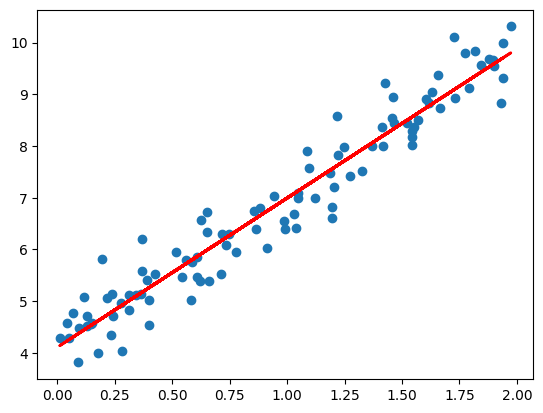

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()